In [1]:
import tensorflow_datasets as tfds
import numpy as np
import tensorflow as tf

from tensorflow_datasets.core.split_builder_test import test_beam

In [2]:
imdb,info=tfds.load('imdb_reviews',with_info=True,as_supervised=True)

C:\Users\dai\PycharmProjects\PythonLab\Natural Language Processing\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]
Generating train examples...: 0 examples [00:00, ? examples/s]
Generating train examples...: 1 examples [00:02,  2.06s/ examples]
Generating train examples...: 6959 examples [00:03, 2848.03 examples/s]
Generating train examples...: 14292 examples [00:04, 4502.67 examples/s]
Generating train examples...: 21077 examples [00:05, 5290.22 examples/s]
                                                                        
Shuffling C:\Users\dai\tensorflow_datasets\imdb_reviews\plain_text\incomplete.ZGHJWZ_1.0.0\imdb_reviews-train.tfrecord*...:   0%|          | 0/25000 [00:00<?, ? examples/s]
Generating splits...:  33%|███▎      | 1/3 [00:09<00:18,  9.50s/ splits]                                                                                                    
Generating test examples...: 0 examples [00:00, ? examples/s]
Generating test examples...: 2936 examples [00:01, 2935.90 example

Dataset imdb_reviews downloaded and prepared to C:\Users\dai\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [3]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='C:\\Users\\dai\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <Sp

In [4]:
imdb

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('unsupervised'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [5]:
train_data,test_data=imdb['train'],imdb['test']

In [30]:
train_sentences=[]
train_labels=[]
test_sentences=[]
test_labels=[]

for sentence,label in train_data:
    train_sentences.append(str(sentence.numpy()))
    train_labels.append(label.numpy())
for sentence,label in test_data:
    test_sentences.append(str(sentence.numpy()))
    test_labels.append(label.numpy())

In [31]:
train_labels

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.in

In [32]:
train_sentences[0]

'b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."'

In [33]:
train_labels[0]

np.int64(0)

In [34]:
test_sentences[0]

'b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel\'s absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven\'t laughed this hard since I saw THE FULL MONTY. (And, even then, I don\'t think I laughed quite this hard... So to speak.) Tukel\'s talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there\'s none of the over-the-top scenery chewing one might\'ve expected from a film like this). DING-A-LING-LESS is a film whose time has come."'

In [35]:
test_labels[0]

np.int64(1)

In [38]:
len(train_sentences),len(test_sentences), type(train_sentences[0])

(25000, 25000, str)

In [39]:
len(train_labels),len(test_labels)

(25000, 25000)

In [40]:
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

Pre-Preprocessing

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
help(Tokenizer)

Help on class Tokenizer in module keras.src.legacy.preprocessing.text:

class Tokenizer(builtins.object)
 |  Tokenizer(
 |      num_words=None,
 |      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 |      lower=True,
 |      split=' ',
 |      char_level=False,
 |      oov_token=None,
 |      analyzer=None,
 |      **kwargs
 |  )
 |
 |  DEPRECATED.
 |
 |  Methods defined here:
 |
 |  __init__(
 |      self,
 |      num_words=None,
 |      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 |      lower=True,
 |      split=' ',
 |      char_level=False,
 |      oov_token=None,
 |      analyzer=None,
 |      **kwargs
 |  )
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  fit_on_sequences(self, sequences)
 |
 |  fit_on_texts(self, texts)
 |
 |  get_config(self)
 |
 |  sequences_to_matrix(self, sequences, mode='binary')
 |
 |  sequences_to_texts(self, sequences)
 |
 |  sequences_to_texts_generator(self, sequences)
 |
 |  texts_to_matrix(self, texts, mode='binar

In [43]:
tokenizer=Tokenizer(num_words=10000)

In [44]:
tokenizer.fit_on_texts(train_sentences)

In [46]:
word_index=tokenizer.word_index

In [47]:
train_sequences=tokenizer.texts_to_sequences(train_sentences)
train_padded=pad_sequences(train_sequences,maxlen=500,truncating='post',padding='post')
test_sequences=tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences,maxlen=500,truncating='post',padding='post')

In [48]:
train_padded.shape

(25000, 500)

In [50]:
train_padded[0]

array([  58,   11,   13,   34,  438,  399,   17,  173,   28,    8,   32,
       1377, 3400,   41,  495,  196,   24,   87,  155,   18,   11,  210,
        339,   28,   69,  247,  212,    8,  485,   61,   69,   87,  115,
         98,   23, 5739,   11, 3316,  656,  776,   11,   17,    6,   34,
        405, 8227,  177, 2476,  425,    1,   91, 1252,  139,   71,  148,
         54,    1, 7524,   71,  228,   69, 2961,   15, 2879, 1505, 4997,
          2,   39, 3946,  118, 1607,   16, 3400,   13,  162,   18,    3,
       1252,  926, 7985,    8,    3,   17,   12,   13, 4199,    4,  101,
        147, 1236,   10,  239,  691,   12,   43,   24,  100,   38,   11,
       7231,   38, 1377,   51,  408,   10,   98, 1213,  873,  144,    9,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

Build the model

In [54]:
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, Bidirectional, LSTM, GRU

Simple RNN

In [55]:
model_rnn=Sequential([
    Embedding(10000,50),
    SimpleRNN(32),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [56]:
model_rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
model_rnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
history=model_rnn.fit(train_padded,train_labels,epochs=10,validation_data=(test_padded,test_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 125ms/step - accuracy: 0.5023 - loss: 0.6936 - val_accuracy: 0.5019 - val_loss: 0.6932
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 122ms/step - accuracy: 0.5172 - loss: 0.6867 - val_accuracy: 0.5045 - val_loss: 0.6945
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.5194 - loss: 0.6832 - val_accuracy: 0.5014 - val_loss: 0.6981
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 122ms/step - accuracy: 0.5318 - loss: 0.6637 - val_accuracy: 0.5033 - val_loss: 0.7114
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 118ms/step - accuracy: 0.5385 - loss: 0.6469 - val_accuracy: 0.5026 - val_loss: 0.7433
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.5414 - loss: 0.6412 - val_accuracy: 0.5029 - val_loss: 0.7701
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.5396 - loss: 0.6403 - val_accuracy: 0.5015 - val_loss: 0.7752
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.5420 - loss: 

In [60]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Model Accuracy')

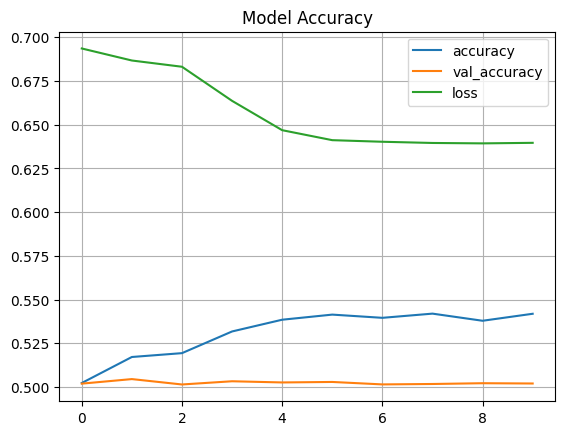

In [61]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['loss'],label='loss')
plt.grid()
plt.legend()
plt.title('Model Accuracy')

LSTM Model

In [62]:
model_rnn=Sequential([
    Embedding(10000,50),
    LSTM(32),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [63]:
model_rnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
history_lstm=model_rnn.fit(train_padded,train_labels,epochs=10,validation_data=(test_padded,test_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 191s 240ms/step - accuracy: 0.4974 - loss: 0.6932 - val_accuracy: 0.5001 - val_loss: 0.6932
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 188s 240ms/step - accuracy: 0.4989 - loss: 0.6933 - val_accuracy: 0.4996 - val_loss: 0.6931
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 187s 239ms/step - accuracy: 0.5047 - loss: 0.6913 - val_accuracy: 0.5099 - val_loss: 0.6908
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 185s 236ms/step - accuracy: 0.5283 - loss: 0.6708 - val_accuracy: 0.5101 - val_loss: 0.6999
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 182s 232ms/step - accuracy: 0.5372 - loss: 0.6514 - val_accuracy: 0.5102 - val_loss: 0.7152
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 190s 243ms/step - accuracy: 0.5406 - loss: 0.6432 - val_accuracy: 0.5110 - val_loss: 0.7289
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 183s 234ms/step - accuracy: 0.5400 - loss: 0.6412 - val_accuracy: 0.5122 - val_loss: 0.7702
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 185s 236ms/step - accuracy: 0.5423 -

Text(0.5, 1.0, 'Model Accuracy')

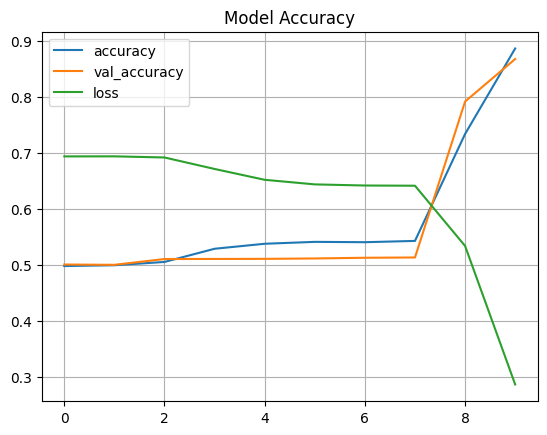

In [65]:
plt.plot(history_lstm.history['accuracy'],label='accuracy')
plt.plot(history_lstm.history['val_accuracy'],label='val_accuracy')
plt.plot(history_lstm.history['loss'],label='loss')
plt.grid()
plt.legend()
plt.title('Model Accuracy')

GRU Model

In [66]:
model_gru = Sequential([
    Embedding(10000, 50),
    GRU(32),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_gru = model_rnn.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 188s 241ms/step - accuracy: 0.9333 - loss: 0.1857 - val_accuracy: 0.8734 - val_loss: 0.3384
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 241ms/step - accuracy: 0.9576 - loss: 0.1241 - val_accuracy: 0.8684 - val_loss: 0.3616
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 188s 241ms/step - accuracy: 0.9774 - loss: 0.0798 - val_accuracy: 0.8680 - val_loss: 0.4312
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 241ms/step - accuracy: 0.9872 - loss: 0.0521 - val_accuracy: 0.8636 - val_loss: 0.4734
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 190s 242ms/step - accuracy: 0.9912 - loss: 0.0384 - val_accuracy: 0.8604 - val_loss: 0.5473
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 242ms/step - accuracy: 0.9938 - loss: 0.0298 - val_accuracy: 0.8572 - val_loss: 0.5830
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 241ms/step - accuracy: 0.9949 - loss: 0.0261 - val_accuracy: 0.8595 - val_loss: 0.6123
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 241ms/step - accuracy: 0.9949 -

Text(0.5, 1.0, 'Model Accuracy')

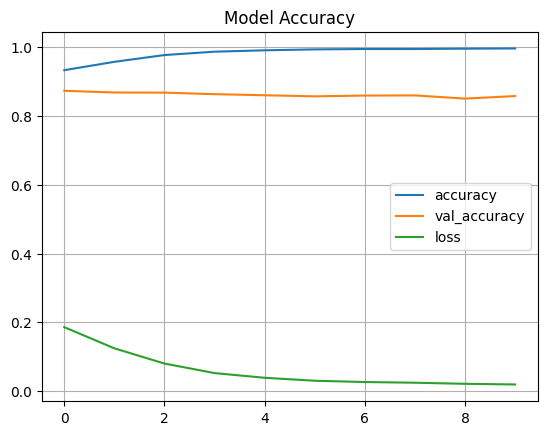

In [67]:
plt.plot(history_gru.history['accuracy'],label='accuracy')
plt.plot(history_gru.history['val_accuracy'],label='val_accuracy')
plt.plot(history_gru.history['loss'],label='loss')
plt.grid()
plt.legend()
plt.title('Model Accuracy')

In [68]:
new1='This was the worst movie I have ever seen. Please do not watch it. Waste of money and time'
new2='A must watch movie. I lived to watch it. It was just amazing'